In [1]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^RuntimeWarning: internal gelsd"
)

In [2]:
# Acquire, load, and preview the data.
data = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')
display(data.head())

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900


In [3]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000,200.000,200.000,200.000,200.000
mean,100.500,147.042,23.264,30.554,14.023
std,57.879,85.854,14.847,21.779,5.217
min,1.000,0.700,0.000,0.300,1.600
25%,50.750,74.375,9.975,12.750,10.375
50%,100.500,149.750,22.900,25.750,12.900
75%,150.250,218.825,36.525,45.100,17.400
max,200.000,296.400,49.600,114.000,27.000


In [4]:
# Instantiate and fit our model
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV', 'Radio', 'Newspaper']]
regr.fit(X, Y)

# Inspect the results
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]

Intercept: 
 [2.93888937]

R-squared:
0.8972106381789521


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


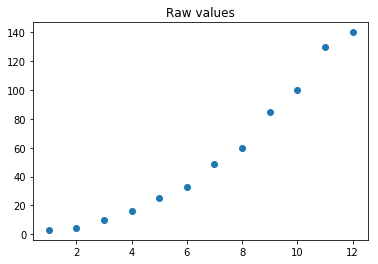

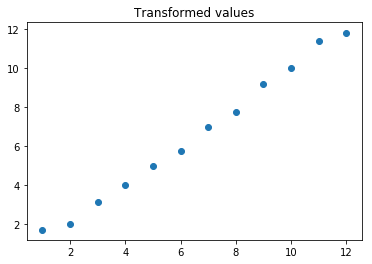

In [5]:
# Sample data
outcome = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
feature = [3, 4, 10, 16, 25, 33, 49, 60, 85, 100, 130, 140]

# Plot the data as-is.  Looks quadratic
plt.scatter(outcome, feature)
plt.title('Raw values')
plt.show()

# Create a feature using a non-linear transformation
sqrt_feature = [math.sqrt(x) for x in feature]

plt.scatter(outcome, sqrt_feature)
plt.title('Transformed values')
plt.show()

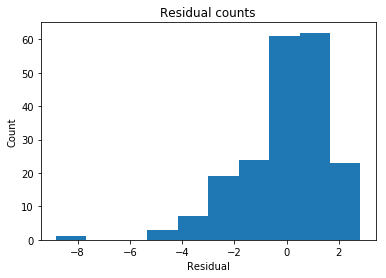

In [6]:
# Extract predicted values
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual
residual = actual - predicted

# This looks concerning
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

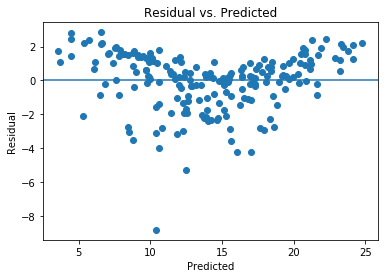

In [7]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

# Hm... looks a bit concerning.

## Drill: fixing assumptions
Judging from the diagnostic plots, your data has a problem with both heteroscedasticity and multivariate non-normality. Use the cell(s) below to see what you can do to fix it.

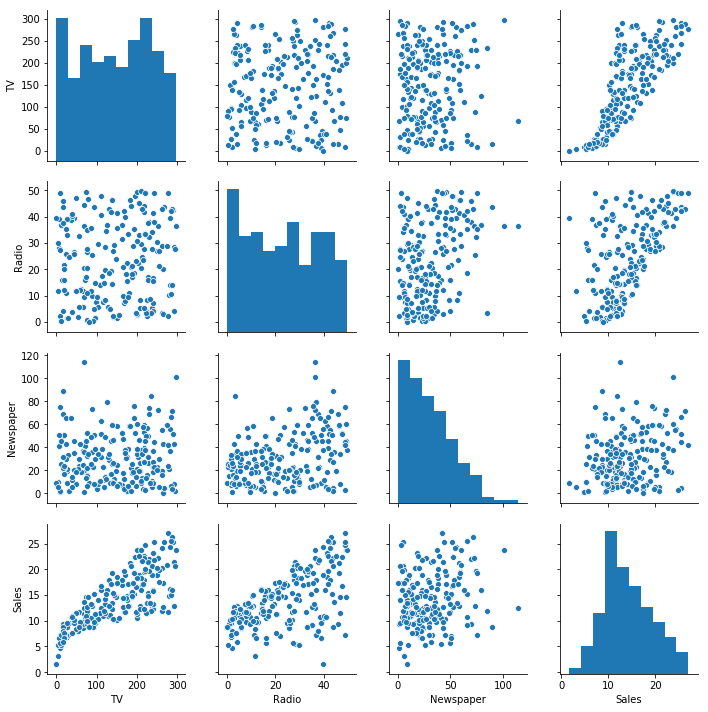

In [8]:
pair_df = data[['TV', 'Radio', 'Newspaper', 'Sales']]
sns.pairplot(pair_df)

In [9]:
sqrt_feature = [x**.5 for x in  pair_df['TV']]

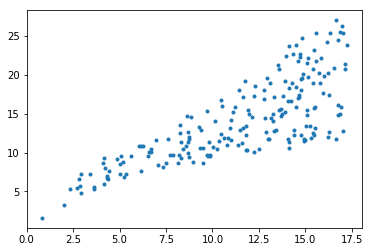

In [10]:
plt.plot(sqrt_feature, pair_df['Sales'], linestyle='none', marker='.')

In [11]:
data['TV_sqrt'] = sqrt_feature

In [12]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV_sqrt','Radio','Newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 9.74947557e-01  1.94767873e-01 -5.25277959e-04]]

Intercept: 
 [-1.60927984]

R-squared:
0.9289549053811124


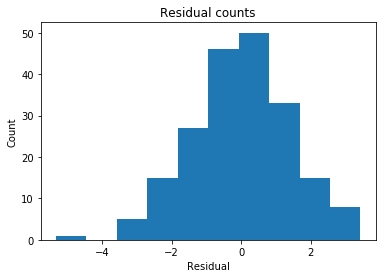

In [13]:
# Extract predicted values
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual
residual = actual - predicted

# This looks concerning
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

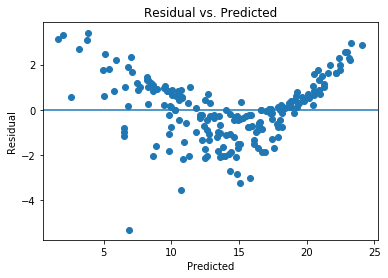

In [14]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [15]:
log_sales = [math.log(x) for x in data['Sales']]

In [16]:
data['log_sales'] = log_sales


Coefficients: 
 [[0.08182174 0.01228612 0.00036864]]

Intercept: 
 [1.33393815]

R-squared:
0.8901205373180584


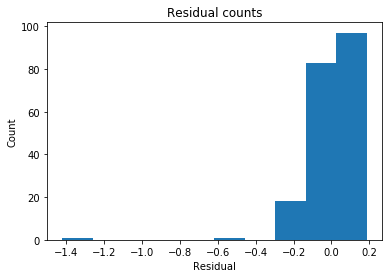

In [17]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['log_sales'].values.reshape(-1, 1)
X = data[['TV_sqrt','Radio','Newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


# Extract predicted values
predicted = regr.predict(X).ravel()
actual = data['log_sales']

# Calculate the error, also called the residual
residual = actual - predicted

# This looks concerning
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

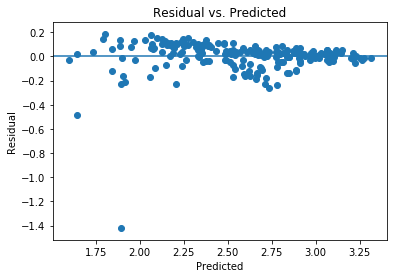

In [18]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()